# Coding assignment 4 : Reaction - Diffusion, the Gray Scott model


  ***Arnaud Rueff & Antonin Urruty***  
  
    
***



In this assignmment we'll work with the Gray Scott model wich is a correlated duo of reaction-diffusion equations,  
used in a lot of different subjects linked to complex patterns in simple systems, such as biochemistry and chemistry.


The model is quite simple at first sight.    

Two particules U and V interracting with each other, folowing **these rules** :  
  
  

* *There's a constant feed rate of u particles into the system*

* *When a U particule meets 2 V particule, it turns into a V particle :* $\; 2V+U\rightarrow 3V$

* *There's a constant kill rate that transform V particles into U ones :* $\; V\rightarrow U$


     


The equations are expressed with the variables ***u*** and ***v*** respectively representing the concentration of the ***U*** and ***V*** species :


\begin{align}
\frac{\partial u}{\partial t} &= D_u \nabla ^2 u - uv^2 + F(1-u)\\
\frac{\partial v}{\partial t} &= D_v \nabla ^2 v + uv^2 - (F + k)v
\end{align}
With  $\nabla ^2$ being the laplacian : 
$$
\nabla ^2 u = \frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}
$$

And where ***Du*** and ***Dv*** are respectively the diffusion coefficient of ***U*** and V.   
Note that we can see that the "kill" rate of ***V*** is represented by ***- ( F + k ) v ***  and the "feed" rate of the ***U*** particle by ***F ( 1 - U )***.

To solve this system, we will use a forward-time/central-space discretization and assume that $\Delta x = \Delta y = \delta$.  
  
  

Let's begin !

***

* **Importing Libraries**

In [72]:
import numpy
import matplotlib.cm as cm
import matplotlib.pyplot as pyplot

* **Initial conditions**

In [73]:
n = 192  # Dimension of the grid of points (dim=n*n)

Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065   # Bacteria 1 

dh = 5./(n-1)  # dx=dy=dh (delta)

T = 8000 # Time of interest 

dt = .9 * dh**2 / (4*max(Du,Dv))# Timestep

nt = int(T/dt)

In [74]:
uvinitial = numpy.load('./uvinitial.npz')
Uin = uvinitial['U']
Vin = uvinitial['V']

This is what it looks like at the beginning of the simulation

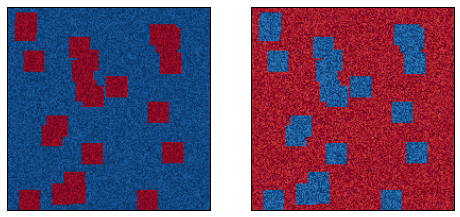

In [75]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(Uin, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(Vin, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

* **Discretization and boundary conditions**

Here's what the discretization looks like after isolating the "next time step" term :

$$
u^{n+1}_{i,j}=\ \left( Nd_1(u^n_{i,j} , v^n_{i,j} , F )+ \frac{D_u}{\delta ^2} \left( \ u^n_{i+1, j} + u^n_{i-1,j}  - 4u^n_{i,j} + u^n_{i, j+1}+ u^n_{i,j-1}\right)\right) \Delta t +\ u^n_{i,j}
$$

$$
v^{n+1}_{i,j}=\ \left( Nd_2(u^n_{i,j},v^n_{i,j}, F, k) + \frac{D_v}{\delta ^2} \left( \ v^n_{i+1, j} + v^n_{i-1,j}  - 4v^n_{i,j} + v^n_{i, j+1}+ v^n_{i,j-1}\right)\right) \Delta t +\ v^n_{i,j}
$$

We will use Neumann boundary conditons on all the domain for both U and V, and they're all equal to zero.

* **Functions for the non-derivative terms and for the discretization**

In [76]:
def Nd1(U,V) :
    return - U*(V)**2 + F*(1-U)

def Nd2(U,V) :
    return U*(V)**2 -(F+k)*V

In [77]:
def gray_scott_solve(Uin, Vin,Nd1,Nd2):

    
    Uplus = Uin.copy()
    Vplus = Vin.copy()
    
    
    for i in range(nt):
        
        U = Uplus.copy()  # Returns U <= Uplus after each iteration
        V = Vplus.copy()  # Returns V <= Vplus after each iteration
        
        Uplus[1:-1,1:-1] = (Nd1(U[1:-1,1:-1], V[1:-1,1:-1]) + Du/(dh**2) \
                            *(U[2:,1:-1] + U[:-2,1:-1] - 4*U[1:-1,1:-1] \
                            + U[1:-1,2:] + U[1:-1,:-2]))*dt \
                            + U[1:-1,1:-1]
        
       
        
            
        Vplus[1:-1,1:-1] = (Nd2(U[1:-1,1:-1], V[1:-1,1:-1]) + Dv/(dh**2) \
                            *(V[2:,1:-1] + V[:-2,1:-1] - 4*V[1:-1,1:-1] \
                            + V[1:-1,2:] + V[1:-1,:-2]))*dt \
                            + V[1:-1,1:-1]
        
                 
        Uplus[-1,:] = Uplus[-2,:]         # Neumann boundary conditions for U
        Uplus[:,-1] = Uplus[:,-2]    
        Uplus[0,:] = Uplus[1,:]
        Uplus[:,0] = Uplus[:,1]
        
        Vplus[-1,:] = Vplus[-2,:]         #Neumann boundary conditions for V
        Vplus[:,-1] = Vplus[:,-2]
        Vplus[0,:]= Vplus[1,:]
        Vplus[:,0]= Vplus[:,1]
        
        
    return U, V

* **Printing the results**

In [78]:
U, V = gray_scott_solve(Uin, Vin,Nd1,Nd2)

print(U[100,::40])

[ 0.92468763  0.85016693  0.66816509  0.90198113  0.90395252]


* **How it looks like at T = 8000s**

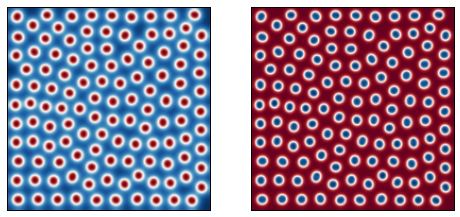

In [79]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

*We didn't succeed in making the animation work, so we took some screenshots of the different steps of the evolution of the results : *

                                                    At T = 100 :
![At T =100](https://raw.githubusercontent.com/aurruty/Module-4-Spreading-Out/master/100U.png)

                                                And at T = 2000 :
![At T =2000](https://raw.githubusercontent.com/aurruty/Module-4-Spreading-Out/master/2000U.png)

* **Just for fun** :

We also tried some of the initial conditions suggested in the provided documents for this assignment.

![At T =2000](https://raw.githubusercontent.com/aurruty/Module-4-Spreading-Out/master/bacteria.png)
This 'coral' one is actually really cool :
![At T =2000](https://raw.githubusercontent.com/aurruty/Module-4-Spreading-Out/master/coral.png)

### Conclusion

At first all we could get from the code was an array of 'nan'.  
After quite some research, we realized the Gray-Scott method could become unstable for not small enough timesteps, and could indeed diverge for badly chosen initial conditions. This is how we found out we had made a mistake in the value of ***Dv*** (we used ***Du*** instead of ***Dv*** in the ***Vplus*** discretization formula) and that there was also a missing bracket along ***dt***. It was then working perfectly, and well enough to convince us this method is actually very effective !

This made us realize how much most of the numerical methods we used in this course are dependent on a good choice of initial conditions, and how well they approximate the solutions of the problems we are trying to solve. Which led us to the fact that this course will be a useful asset for the rest of our studies in the scientific domain. At first we were really bad at it, but finally we somehow started to like it and understand the possibilities we could expect from this kind of knowledge, even if we still couldn't get these animations to work.

Wishing you our best wishes for the upcoming new year !


